In [1]:
#import pickle

import sys
import pathlib
sys.path.append(str(pathlib.PurePath(pathlib.Path.cwd().parent)))

import numpy as np
import matplotlib.pyplot as plt

import dwave.system
from dwave.system import DWaveSampler, EmbeddingComposite

from src.particle_funcs import distance_matrix as distance_matrix
import src.leap_funcs.qubo.q_matrix as q_matrix

[1. 0. 0. 0. 1. 0. 0. 0. 1.]


C:\Users\oahre\AppData\Local\Temp\ipykernel_35724\1675977835.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_initial.show()


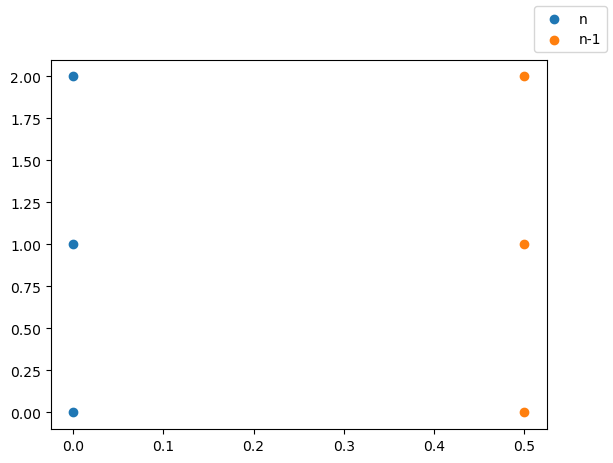

In [2]:
num_particles = 3

use_dimod_exact_solver = False

part_coords_n = np.zeros((num_particles,2))
part_coords_nm1 = np.zeros((num_particles,2))

for i in range(np.shape(part_coords_n)[0]):
    part_coords_n[i,:] = [0, i]
    part_coords_nm1[i,:] = [0.5*1, i]

fig_initial, axs_initial = plt.subplots(1,1)
axs_initial.scatter(part_coords_n[:,0], part_coords_n[:,1], label="n")
axs_initial.scatter(part_coords_nm1[:,0], part_coords_nm1[:,1], label="n-1")
fig_initial.legend()
fig_initial.show()

correct_sol = np.zeros(num_particles*num_particles)
for i in range(1, num_particles+1):
    correct_sol[(i-1)*num_particles + i -1] = 1.

print(correct_sol)

In [3]:
distances = distance_matrix.calc_phi_ij(part_coords_n, part_coords_nm1, type='tanh_minimum', tanh_min=0.1)
print(distances)
ids_remove = np.where(distances > 4)
print(ids_remove)
print(np.shape(ids_remove))
print(np.max(distances))

min:  0.5
tanh_min:  0.1
min:  0.1
min:  0.09966799462495582
[[0.09966799 0.21995307 0.39043279]
 [0.21995307 0.09966799 0.21995307]
 [0.39043279 0.21995307 0.09966799]]
(array([], dtype=int64), array([], dtype=int64))
(2, 0)
0.39043279055286406


In [4]:
Q_dist = q_matrix.q_dist(distances)
assert (Q_dist.transpose() == Q_dist).all(), 'Q_dist is not symmetric'
with np.printoptions(precision=3):
    print(Q_dist)

[[0.01  0.022 0.039 0.    0.    0.    0.    0.    0.   ]
 [0.022 0.048 0.086 0.    0.    0.    0.    0.    0.   ]
 [0.039 0.086 0.152 0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.048 0.022 0.048 0.    0.    0.   ]
 [0.    0.    0.    0.022 0.01  0.022 0.    0.    0.   ]
 [0.    0.    0.    0.048 0.022 0.048 0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.152 0.086 0.039]
 [0.    0.    0.    0.    0.    0.    0.086 0.048 0.022]
 [0.    0.    0.    0.    0.    0.    0.039 0.022 0.01 ]]


In [5]:
Q_part = q_matrix.q_part(np.shape(distances)[0])
print(Q_part)
#assert (Q_part.transpose() == Q_part).all(), 'Q_part is not symmetric'
# changed to only return upper triangular part, so is definitely not symmetric

[[-1.  2.  2.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  2.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  2.  2.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  2.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  2.  2.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  2.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.]]


In [6]:
Q_pos = q_matrix.q_pos(np.shape(distances)[0])
print(Q_pos)
#assert (Q_pos.transpose() == Q_pos).all(), 'Q_pos is not symmetric'
# changed to only return upper triangular part, so is definitely not symmetric

[[-1.  0.  0.  2.  0.  0.  2.  0.  0.]
 [ 0. -1.  0.  0.  2.  0.  0.  2.  0.]
 [ 0.  0. -1.  0.  0.  2.  0.  0.  2.]
 [ 0.  0.  0. -1.  0.  0.  2.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  0.  2.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.  2.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.]]


In [7]:
Q_array = Q_dist + Q_part + Q_pos

with np.printoptions(precision=3, suppress=True):
    print(Q_array)

[[-1.99   2.022  2.039  2.     0.     0.     2.     0.     0.   ]
 [ 0.022 -1.952  2.086  0.     2.     0.     0.     2.     0.   ]
 [ 0.039  0.086 -1.848  0.     0.     2.     0.     0.     2.   ]
 [ 0.     0.     0.    -1.952  2.022  2.048  2.     0.     0.   ]
 [ 0.     0.     0.     0.022 -1.99   2.022  0.     2.     0.   ]
 [ 0.     0.     0.     0.048  0.022 -1.952  0.     0.     2.   ]
 [ 0.     0.     0.     0.     0.     0.    -1.848  2.086  2.039]
 [ 0.     0.     0.     0.     0.     0.     0.086 -1.952  2.022]
 [ 0.     0.     0.     0.     0.     0.     0.039  0.022 -1.99 ]]


In [8]:
Q_dict = q_matrix.Q_convert_to_dict(Q_array)
#Q_dict = q_matrix.Q_convert_to_dict(Q_array_rem)
print(Q_dict)

{(1, 1): -1.9900662908474398, (1, 2): 2.0219222818853484, (1, 3): 2.0389136532702294, (1, 4): 2.0, (1, 7): 2.0, (2, 2): -1.951620644848776, (2, 3): 2.085876892817907, (2, 5): 2.0, (2, 8): 2.0, (3, 3): -1.8475622360611035, (3, 6): 2.0, (3, 9): 2.0, (4, 4): -1.951620644848776, (4, 5): 2.0219222818853484, (4, 6): 2.048379355151224, (4, 7): 2.0, (5, 5): -1.9900662908474398, (5, 6): 2.0219222818853484, (5, 8): 2.0, (6, 6): -1.951620644848776, (6, 9): 2.0, (7, 7): -1.8475622360611035, (7, 8): 2.085876892817907, (7, 9): 2.0389136532702294, (8, 8): -1.951620644848776, (8, 9): 2.0219222818853484, (9, 9): -1.9900662908474398}


In [9]:
with open('../API_Token.txt') as file:
    token = file.readline().rstrip()
    architecture = file.readline().rstrip()

sampler = DWaveSampler(token = token, architecture='pegasus')
print(DWaveSampler._get_solver(sampler))
print(sampler.properties.keys())
print(sampler.properties['annealing_time_range'])
print(sampler.properties['programming_thermalization_range'])
print(sampler.properties['readout_thermalization_range'])
print(sampler.properties['per_qubit_coupling_range'])
print(sampler.properties['h_range'])
print(sampler.properties['j_range'])

StructuredSolver(id='Advantage_system4.1')
dict_keys(['num_qubits', 'qubits', 'couplers', 'h_range', 'j_range', 'supported_problem_types', 'parameters', 'vfyc', 'anneal_offset_ranges', 'anneal_offset_step', 'anneal_offset_step_phi0', 'annealing_time_range', 'chip_id', 'default_annealing_time', 'default_programming_thermalization', 'default_readout_thermalization', 'extended_j_range', 'h_gain_schedule_range', 'max_anneal_schedule_points', 'max_h_gain_schedule_points', 'num_reads_range', 'per_qubit_coupling_range', 'problem_run_duration_range', 'problem_timing_data', 'programming_thermalization_range', 'readout_thermalization_range', 'tags', 'topology', 'category', 'quota_conversion_rate'])
[0.5, 2000.0]
[0.0, 10000.0]
[0.0, 10000.0]
[-18.0, 15.0]
[-4.0, 4.0]
[-1.0, 1.0]


In [10]:
sampler_emb = EmbeddingComposite(sampler)
sample = sampler_emb.sample_qubo(Q_dict, num_reads = 10, annealing_time=0.5, programming_thermalization=0, readout_thermalization=0)

In [12]:
print(sample)
print(sample.info)

   1  2  3  4  5  6  7  8  9    energy num_oc. chain_.
0  1  0  0  0  1  0  0  0  1 -5.970199       3     0.0
1  1  0  0  0  0  1  0  1  0 -5.893308       2     0.0
2  0  0  1  1  0  0  0  1  0 -5.750804       2     0.0
3  0  0  1  0  1  0  1  0  0 -5.685191       2     0.0
4  1  0  0  0  1  1  0  1  0 -3.861452       1     0.0
['BINARY', 5 rows, 10 samples, 9 variables]
{'timing': {'qpu_sampling_time': 630.6, 'qpu_anneal_time_per_sample': 0.5, 'qpu_readout_time_per_sample': 42.02, 'qpu_access_time': 15391.17, 'qpu_access_overhead_time': 2169.83, 'qpu_programming_time': 14760.57, 'qpu_delay_time_per_sample': 20.54, 'total_post_processing_time': 94.0, 'post_processing_overhead_time': 94.0}, 'problem_id': 'f043a1ff-e68c-4cd3-b5ea-edd231ac9b94'}


In [13]:
#import dill as pickle
#import json
import pickle

In [14]:
a = pickle.dumps(sample, protocol=0)
pickle_test_file = 'pickle_test_sampleset.txt'
with open(pickle_test_file,'w+b') as file:
    pickle.dump(sample, file=file, protocol=0)
print(a)

b'ccopy_reg\n_reconstructor\np0\n(cdimod.sampleset\nSampleSet\np1\nc__builtin__\nobject\np2\nNtp3\nRp4\n(dp5\nV_record\np6\ncnumpy.core.multiarray\n_reconstruct\np7\n(cnumpy\nrecarray\np8\n(I0\ntp9\nc_codecs\nencode\np10\n(Vb\np11\nVlatin1\np12\ntp13\nRp14\ntp15\nRp16\n(I1\n(I5\ntp17\ncnumpy\ndtype\np18\n(cnumpy\nrecord\np19\nI00\nI01\ntp20\nRp21\n(I3\nV|\np22\nN(Vsample\np23\nVenergy\np24\nVnum_occurrences\np25\nVchain_break_fraction\np26\ntp27\n(dp28\ng23\n(g18\n(VV9\np29\nI00\nI01\ntp30\nRp31\n(I3\ng22\n(g18\n(Vi1\np32\nI00\nI01\ntp33\nRp34\n(I3\ng22\nNNNI-1\nI-1\nI0\ntp35\nb(I9\ntp36\ntp37\nNNI9\nI1\nI0\ntp38\nbI0\ntp39\nsg24\n(g18\n(Vf8\np40\nI00\nI01\ntp41\nRp42\n(I3\nV<\np43\nNNNI-1\nI-1\nI0\ntp44\nbI9\ntp45\nsg25\n(g18\n(Vi4\np46\nI00\nI01\ntp47\nRp48\n(I3\ng43\nNNNI-1\nI-1\nI0\ntp49\nbI17\ntp50\nsg26\n(g42\nI21\ntp51\nsI29\nI1\nI16\ntp52\nbI00\ng10\n(V\x01\\u0000\\u0000\\u0000\x01\\u0000\\u0000\\u0000\x01\xc8\xbd0\xd0{\xe1\x17\xc0\x03\\u0000\\u0000\\u0000\\u0000\\u0000\\u0000\

In [18]:
with open('pickle_test_sampleset.txt', 'r+b') as file:
    b = pickle.load(file)
print(b)
print(b.info)
print(type(b))
print(type(sample))

   1  2  3  4  5  6  7  8  9    energy num_oc. chain_.
0  1  0  0  0  1  0  0  0  1 -5.970199       3     0.0
1  1  0  0  0  0  1  0  1  0 -5.893308       2     0.0
2  0  0  1  1  0  0  0  1  0 -5.750804       2     0.0
3  0  0  1  0  1  0  1  0  0 -5.685191       2     0.0
4  1  0  0  0  1  1  0  1  0 -3.861452       1     0.0
['BINARY', 5 rows, 10 samples, 9 variables]
{'timing': {'qpu_sampling_time': 630.6, 'qpu_anneal_time_per_sample': 0.5, 'qpu_readout_time_per_sample': 42.02, 'qpu_access_time': 15391.17, 'qpu_access_overhead_time': 2169.83, 'qpu_programming_time': 14760.57, 'qpu_delay_time_per_sample': 20.54, 'total_post_processing_time': 94.0, 'post_processing_overhead_time': 94.0}, 'problem_id': 'f043a1ff-e68c-4cd3-b5ea-edd231ac9b94'}
<class 'dimod.sampleset.SampleSet'>
<class 'dimod.sampleset.SampleSet'>


In [19]:
a = sampler
print(a)
print(dir(a))
#a.__getstate__ = a.__dict__.copy()
b = a.__dict__
print(b.keys())
with open('sampler_dict.txt', 'w') as file:
    for key in b.keys():
        value = b[key]
        file.write('{key} {value}\n'.format(key=key, value=value))
#pickle.dumps(a.__reduce__())
#pickle.dumps(b)
#pickle.dumps(a.__dict__)

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_adjacency', '_edgelist', '_get_solver', '_nodelist', '_parameters', '_properties', '_solver_penalty', 'adjacency', 'client', 'edgelist', 'failover', 'nodelist', 'parameters', 'properties', 'remove_unknown_kwargs', 'retry_interval', 'sample', 'sample_ising', 'sample_qubo', 'solver', 'structure', 'to_networkx_graph', 'trigger_failover', 'valid_bqm_graph', 'validate_anneal_schedule', 'warnings_default']
dict_keys(['failover', 'retry_interval', '_solver_penalty', 'client', 'solver', '_properties', '_parameters', '_nodelist', '_edgelist', '_adjacency'])


In [20]:
print(dir(a.__dict__['client']))
a.__dict__['client'].__dict__


['ANY_STATUS_NO_RESULT', 'ANY_STATUS_ONGOING', 'DEFAULTS', 'DEFAULT_API_ENDPOINT', 'DEFAULT_API_REGION', 'STATUS_CANCELLED', 'STATUS_COMPLETE', 'STATUS_FAILED', 'STATUS_IN_PROGRESS', 'STATUS_PENDING', '_CANCEL_THREAD_COUNT', '_DEPRECATED_CONFIG_PROPERTIES_MAP', '_ENCODE_PROBLEM_THREAD_COUNT', '_LOAD_THREAD_COUNT', '_POLL_GROUP_TIMEFRAME', '_POLL_THREAD_COUNT', '_REGIONS_CACHE_MAXAGE', '_SOLVERS_CACHE_MAXAGE', '_STATUS_QUERY_SIZE', '_SUBMISSION_THREAD_COUNT', '_SUBMIT_BATCH_SIZE', '_UPLOAD_PART_RETRIES', '_UPLOAD_PART_SIZE_BYTES', '_UPLOAD_PART_THREAD_COUNT', '_UPLOAD_PROBLEM_THREAD_COUNT', '_UPLOAD_REQUEST_RETRIES', '_UPLOAD_RETRIES_BACKOFF', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slotnames__', '__str__'

{'defaults': {'config_file': None,
  'profile': None,
  'client': 'base',
  'metadata_api_endpoint': 'https://cloud.dwavesys.com/metadata/v1/',
  'region': 'na-west-1',
  'leap_api_endpoint': None,
  'leap_client_id': None,
  'endpoint': None,
  'token': None,
  'solver': {'order_by': '-num_active_qubits'},
  'proxy': None,
  'permissive_ssl': False,
  'request_timeout': 60,
  'polling_timeout': None,
  'connection_close': False,
  'headers': None,
  'client_cert': None,
  'client_cert_key': None,
  'poll_backoff_min': 0.05,
  'poll_backoff_max': 60,
  'poll_backoff_base': 1.3,
  'http_retry_total': 10,
  'http_retry_connect': None,
  'http_retry_read': None,
  'http_retry_redirect': None,
  'http_retry_status': None,
  'http_retry_backoff_factor': 0.01,
  'http_retry_backoff_max': 60},
 'config': ClientConfig(metadata_api_endpoint='https://cloud.dwavesys.com/metadata/v1/', region='na-west-1', leap_api_endpoint='https://cloud.dwavesys.com/leap/api/', endpoint='https://cloud.dwavesys.co

In [20]:
#a = pickle.dumps(sampler_emb, protocol=0)
pickle_test_file = 'pickle_test_embedding_composite.txt'
with open(pickle_test_file,'w+b') as file:
    pickle.dump(sampler, file=file, protocol=0)
#print(a)

PicklingError: Can't pickle <class '_thread.lock'>: attribute lookup lock on _thread failed

In [ ]:
with open('pickle_test_sampleset.txt', 'r+b') as file:
    b = pickle.load(file)
print(b)